# 문서 요약 예제

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import urllib.request
import requests
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_csv("/content/drive/MyDrive/colab/Reviews.csv", nrows=100000)
print("전체 샘플 :", len(data))

전체 샘플 : 100000


In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data = data[["Text","Summary"]]
data.sample(15)

,Text,Summary
9837,Love the cinnamon taste but way too sweet. I g...,Cinnamon
22147,We have a lab who is a TOUGH chewer...this las...,NOT for tough chewers!!!
94993,This tea definitely works. I have frequent pro...,Just what i needed
82976,I love the fact that it does not come in a pla...,Great flavor
67851,after opening numerous bags I found that none ...,completely ripped off
16396,My favorite to use in my Keurig. The Breakfast...,Wonderfully delicious!
16705,I like the sparking refreshing taste of Kiwi i...,Cool refreshing Kiwi taste
50513,These are very top of the line in quality and ...,Good Lemon Drops
68733,Just what I needed in order to select a favori...,Nice selection
48566,okay so this one I did not care for. I HATE pa...,dont like banana


## 데이터 전처리

### 중복 및 NULL값 제거

In [5]:
print("Text 중복배제 샘플 :", data['Text'].nunique())
print("Summary 중복배제 샘플", data['Summary'].nunique())

Text 중복배제 샘플 : 88426
Summary 중복배제 샘플 72348


In [6]:
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플 :",(len(data)))

전체 샘플 : 88426


In [7]:
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [8]:
data.dropna(axis=0, inplace=True)
print('전체 샘플 :',(len(data)))

전체 샘플 : 88425


### 텍스트 정규화와 불용어 제거

[텍스트 정규화 참조 링크](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [10]:
print('불용어 개수 :', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [11]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, "lxml").text #<br/>,<a href>등 html태그 제거
    sentence = re.sub(r'\([^)]*\)','', sentence) # 괄호로 닫힌 문자열 제거
    sentence = re.sub('"','',sentence)
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거, Ex) roland`s -> roland
    sentence = re.sub("[^a-zA-Z]"," ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmm yeah -> umm yeah
    
    # 불용어 제거(text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [12]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [13]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 소요
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


In [14]:
clean_summary = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 소요
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


In [15]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [16]:
data.isnull().sum()

Text        0
Summary    70
dtype: int64

In [17]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


### 데이터셋 분석

텍스트 최소 길이 : 2
텍스트 최대 길이 : 1235
텍스트 평균 길이 : 38.792428272310566
요약 최소 길이 : 1
요약 최대 길이 : 28
요약 평균 길이 : 4.010729443721352


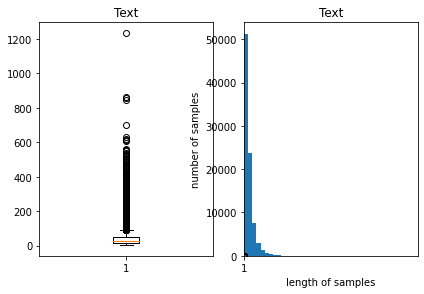

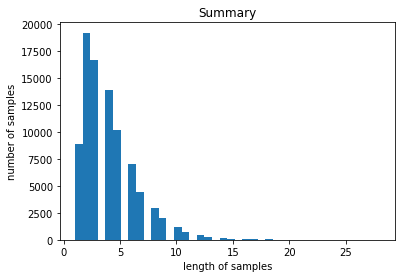

In [18]:
import matplotlib.pyplot as plt
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print(f'텍스트 최소 길이 : {np.min(text_len)}')
print(f'텍스트 최대 길이 : {np.max(text_len)}')
print(f'텍스트 평균 길이 : {np.mean(text_len)}')
print(f'요약 최소 길이 : {np.min(summary_len)}')
print(f'요약 최대 길이 : {np.max(summary_len)}')
print(f'요약 평균 길이 : {np.mean(summary_len)}')

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

텍스트의 최소 길이 : 2  
텍스트의 최대 길이 : 1235  
텍스트의 평균 길이 : 38.792428272310566  
요약의 최소 길이 : 1  
요약의 최대 길이 : 28  
요약의 평균 길이 : 4.010729443721352  

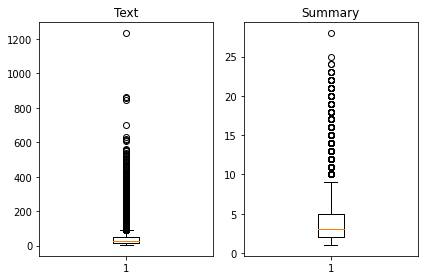

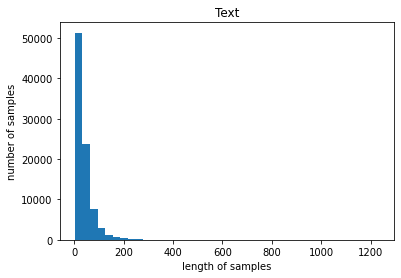

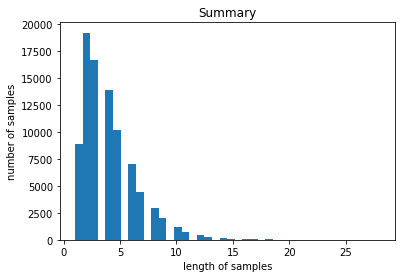

Text 최대 길이와 Summary의 적절한 최대 길이 정의

In [19]:
text_max_len = 50
summary_max_len = 8

In [20]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플 비율: %s'%(max_len, (cnt / len(nested_list))))
print('done')

done


In [21]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플 비율: 0.9424593967517402


In [22]:
# 최대 길이보다 작은 데이터만 가져오기
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', len(data))

전체 샘플수 : 65818


### 시작 토큰(SOS)과 종료 토큰(EOS) 추가하기

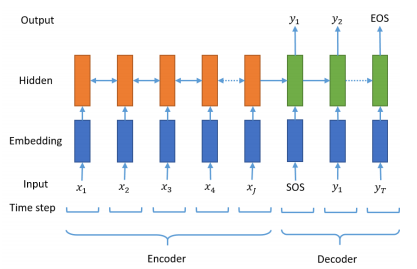

In [23]:
# 요약 데이터에 시작 토큰과 종료 토큰 추가
data['decoder_input'] = data['Summary'].apply(lambda x: 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x: x + ' eostoken')
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [24]:
encoder_input = np.array(data['Text']) # 인코더 입력
decoder_input = np.array(data['decoder_input']) # 디코더 입력
decoder_target = np.array(data['decoder_target']) # 디코더 레이블

In [25]:
# 랜덤하게 섞인 정수 시퀸스 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[26971 22960  8095 ... 16272 44049 16271]


In [26]:
# 정수 시퀸스를 이용 샘플 순서를 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

## 데이터 분리

In [27]:
# 데이터셋 중 20%를 테스트 셋으로 분리
n_of_val = int(len(encoder_input) * 0.2)
print('테스트 데이터 수: {}'.format(n_of_val))

테스트 데이터 수: 13163


In [28]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print("훈련 데이터 개수 : {}".format(len(encoder_input_train)))
print(f"훈련 레이블 개수 : {len(decoder_input_train)}")
print(f"테스트 데이터 개수 : {len(encoder_input_test)}")
print(f"테스트 레이블 개수 : {len(decoder_input_test)}")

훈련 데이터 개수 : 52655
훈련 레이블 개수 : 52655
테스트 데이터 개수 : 13163
테스트 레이블 개수 : 13163


### 정수인코딩

In [29]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성


In [30]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어 수
rare_cnt = 0 # 빈도수가 threshold보다 작은 단어개수 카운트
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 빈도수가 threshold보다 작은 단어 등장 빈도수 총합

for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(f"단어 집합(vocab) 크기 : {total_cnt}")
print(f"등장 빈도가 {threshold-1}번 이하인 희귀 단어 수{rare_cnt}")
print(f"단어 집합에서 희귀 단어 제외 후 단어 집합 크기 {total_cnt - rare_cnt}")
print(f"단어 집합에서 희귀 단어 비율: {(rare_cnt / total_cnt)*100}")
print(f"전체 등장 빈도에서 희귀 단어 등장 빈도 비율: {(rare_freq / total_freq)*100}")

단어 집합(vocab) 크기 : 32019
등장 빈도가 6번 이하인 희귀 단어 수23758
단어 집합에서 희귀 단어 제외 후 단어 집합 크기 8261
단어 집합에서 희귀 단어 비율: 74.19969393172804
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.388398220349939


6회 이하 빈도의 단어들은 단어 집합에서 70% 이상 차지하지만   
실제 훈련 데이터에서 등장 빈도는 3%에 불과

In [31]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합 크기 8000개로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [32]:
# 텍스트 시퀸스를 정수 시퀸스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)
print(encoder_input_train[:3])

[[280, 18, 1, 176, 1989, 195, 143, 37, 31, 1989, 612, 803, 484, 3, 3461, 458, 132, 1], [1009, 1737, 85, 355, 23, 1865, 82, 1216, 731, 1160, 925, 580, 51, 71, 944, 88, 1398, 4492, 3462, 444, 457, 190, 88, 156, 67, 5296, 205, 503, 2201, 2431, 910], [109, 4070, 286, 333, 844, 515, 377, 560, 612, 311, 6, 109, 463, 17, 124, 20]]


Summary 데이터에 대한 작업 수행

In [33]:
target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(decoder_input_train)

In [34]:
threshold = 6
total_cnt = len(target_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 빈도수가 threshold보다 작은 단어 수 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 빈도수가 threshold보다 작은 단어의 등장 빈도수 총합

for key, value in target_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10504
등장 빈도가 5번 이하인 희귀 단어의 수: 8120
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2384
단어 집합에서 희귀 단어의 비율: 77.3038842345773
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.889556267489943


단어 집합의 약 77%를 차지하지만  
훈련 데이터 등장 빈도는 5.87%

In [35]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 41], [1, 1547, 300, 3, 31], [1, 184, 71, 74], [1, 5, 8], [1, 49, 35, 102, 25]]
target
decoder  [[41, 2], [1547, 300, 3, 31, 2], [184, 71, 74, 2], [5, 8, 2], [49, 35, 102, 25, 2]]


전처리를 거치면서 비어버린 요약문 처리

In [36]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print(f'삭제할 훈련 데이터 개수 : {len(drop_train)}')
print(f"삭제할 테스트 데이터 개수 : {len(drop_test)}")

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터 개수', len(encoder_input_train))
print('훈련 레이블 개수', len(decoder_input_train))
print('테스트 데이터 개수', len(encoder_input_test))
print('테스트 레이블 개수', len(decoder_input_test))

삭제할 훈련 데이터 개수 : 1278
삭제할 테스트 데이터 개수 : 337
훈련 데이터 개수 51377
훈련 레이블 개수 51377
테스트 데이터 개수 12826
테스트 레이블 개수 12826


In [37]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')


## 모델 설계하기

In [38]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
embedding_dim = 128
hidden_size = 256 

# 인코더
encoder_inputs = Input(shape=(text_max_len,))
# 인코더 임베딩
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더 LSTM1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
# 인코더 LSTM2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
# 인코더 LSTM3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

hidden state : LSTM의 수용력(capacity)를 정하는 파라미터  
LSTM의 뉴런 개수와 비슷한 개념  

dropout: 일반적으로 레이어에 드롭아웃  
recurrent dropout : dropout을 레이어가 아닌 time step마다 해주는 방식  

아래 그림은 일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 것을 시각적으로 표현한 것입니다. 색이 있는 화살표는 dropout을 나타낸 것이에요. (색이 다른 것은 다른 dropout mask를 사용했다는 표시인데, 지금은 그냥 넘어가셔도 됩니다.) 우리가 현재 사용한 LSTM은 dropout과 recurrent dropout을 모두 사용했으니 오른쪽 그림과 같은 형태겠군요. 참고로 dropout과 recurrent dropout을 모두 사용한 것을 Variational Dropout이라고도 해요.

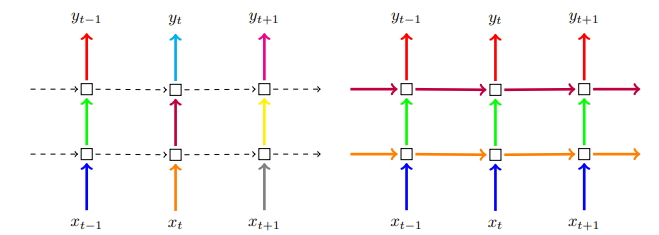

[Recurrent Dropout without Memory Loss](https://arxiv.org/pdf/1603.05118v2.pdf)

인코더의 임베딩과 LSTM을 설계하는것과 비슷하지만
LSTM의 입력을 정의할 때 initial_state 인자 값으로 인코더의 hidden state와 cell state값을 넣어야 함

In [40]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [41]:
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

#모델 정의
model = Model([encoder_inputs,decoder_inputs],decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      1024000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 50, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

단어장인 tar_vocab의 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀기 위해 Dense의 인자로 tar_vocab, 활성함수는 소프트맥스

현재까지 설계한 것이 기본적인 seq2seq  
출력층의 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 바로 어텐션 메커니즘

### 어텐션 메커니즘

[구현할 어텐션에 대한 설명](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AdditiveAttention)

In [42]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층
attn_layer = AdditiveAttention(name='attention_layer')
# 인코더, 디코더 모든 time step hidden state 어텐션 층에 전달하고 결과 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션 결과와 디코더 hidden state 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      1024000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 50, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 249s 1s/step - loss: 2.6982 - val_loss: 2.4386
Epoch 2/50
201/201 [==============================] - 232s 1s/step - loss: 2.3707 - val_loss: 2.2804
Epoch 3/50
201/201 [==============================] - 241s 1s/step - loss: 2.2141 - val_loss: 2.1599
Epoch 4/50
201/201 [==============================] - 293s 1s/step - loss: 2.1035 - val_loss: 2.0789
Epoch 5/50
201/201 [==============================] - 296s 1s/step - loss: 2.0201 - val_loss: 2.0226
Epoch 6/50
201/201 [==============================] - 283s 1s/step - loss: 1.9535 - val_loss: 1.9799
Epoch 7/50
201/201 [==============================] - 278s 1s/step - loss: 1.8990 - val_loss: 1.9486
Epoch 8/50
 44/201 [=====>........................] - ETA: 3:07 - loss: 1.8442

[Early Stopping에 대한 참조 링크](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

정수 행렬을 텍스트 데이터로

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

### 인코더

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


### 디코더

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

### 인퍼런스, 단어 시퀸스 완성

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

### 모델 테스트

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

50개 샘플로 확인

In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

## 추출적 요약

summa 설치 확인

In [ ]:
import requests
from summa.summarizer import summarize

matrix 시놉시스 다운

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
print(text[:1500])

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))

In [ ]:
# 리스트로 받을 경우
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

In [ ]:
# 단어의 수를 정해서 받기
print('Summary:')
print(summarize(text, words=50))

# 프로젝트 : 뉴스기사 요약

In [ ]:
!git clone https://github.com/sunnysai12345/News_Summary.git

In [ ]:
data = pd.read_csv('https://github.com/sunnysai12345/News_Summary/blob/master/news_summary.csv', encoding='iso-8859-1')

In [ ]:
data.sample(10)